## Computer Vision (EECE 7219) Assignment #2
### University of Memphis, Spring 2023
#### Instructor: Dr. Yeasin

Bereket Kebede, Gradaute Student, EECE

## Camera Calibration 

Objective: Learn to compute projection matrix, intrinsic and extrinsic parameters

1. Download and print a checkerboard image (use the Checkerboard-A4-30mm-8x6.pdf file).

2. Take a picture of the printed checkerboard image. Remember to record the distance from your camera to the checkerboard object.

3. Assign 3D coordinates to each corner of the checkerboard squares. Use the Pythagorean triangle rule for the depth of each corner point.

4. Choose a reference point (say bottom left corner) of the checkerboard and coordinate to that point. Calculate the world coordinate of each corner point with respect to the reference point. 

5. Use these 3D-2D correspondences to compute the projection matrix, intrinsic and extrinsic parameters.

## Getting Started
-----

In [1]:
#import necessary libaries

import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python36/Lib/site-packages")

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import yaml

1. Why use checkerboard images?
2. Computing the projection matrix, instrinsic and extrinsic parameters

## 1. Why use checkerboard images?

Checkerboard patterns in an image are easily recognizable and simple to spot. The checkerboard's square corners are the best places to locate them because of their strong slopes in both directions.

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*4,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:4].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

## 2. Computing the projection matrix, instrinsic and extrinsic parameters

cv2.calibrateCamera()
Finds the camera intrinsic and extrinsic parameters from several views of a calibration pattern.


retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, imageSize)

**Input** <br>

objectPoints: A vector of vector of 3D points <br>
imagePoints: A vector of vectors of the 2D image points <br>
imageSize: Size of the image <br>

**Output** <br>

cameraMatrix: Intrinsic camera matrix <br>
rvecs: Output vector of rotation vectors <br>
tvecs: Output vector of translation vectors <br>
distCoeffs: Lens distortion coefficients <br>

Number of images used for calibration:  3


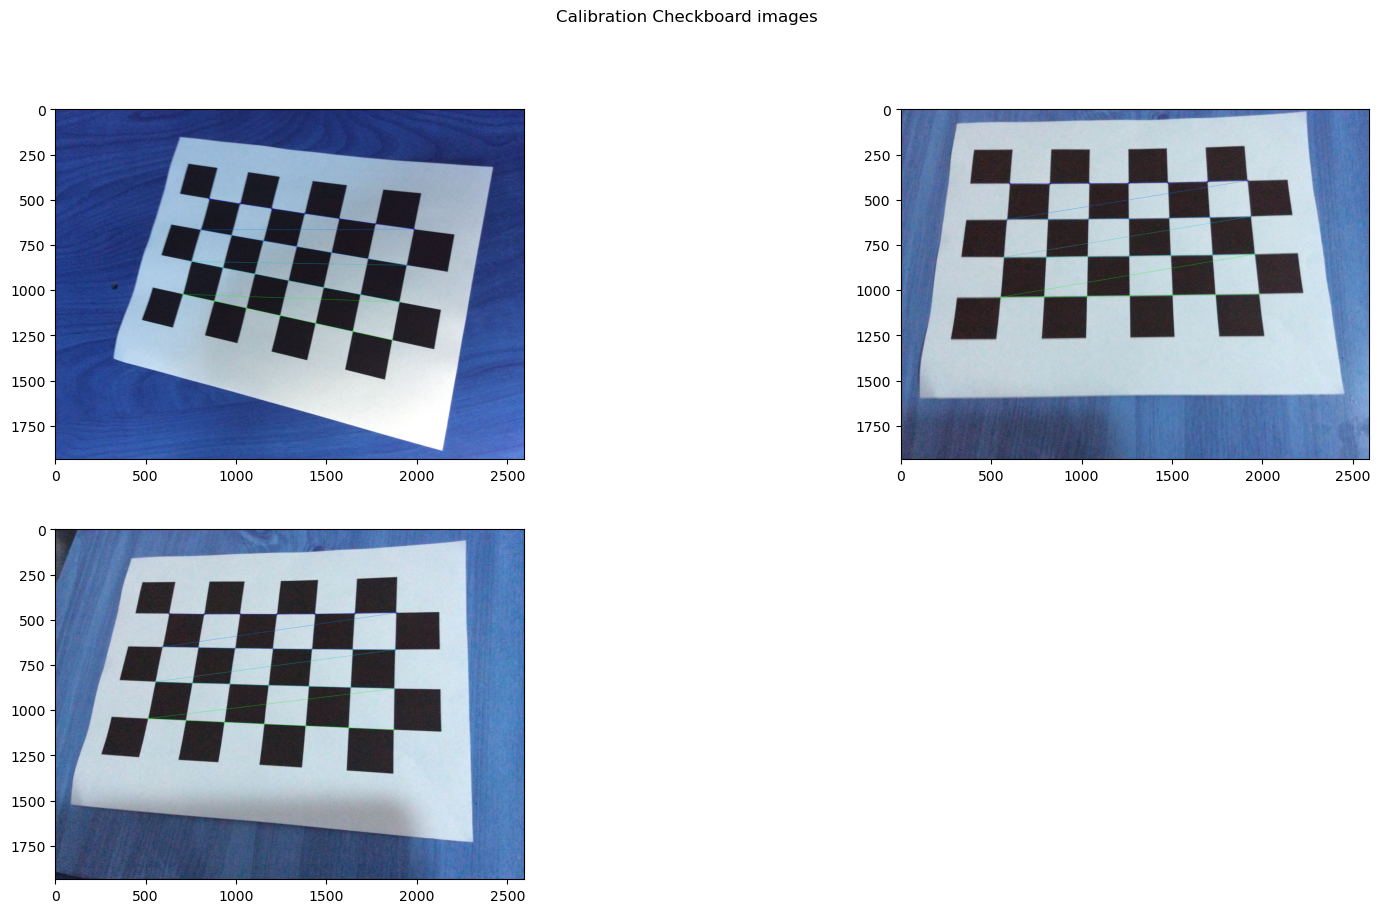

In [25]:
images = glob.glob(r'checkboards/*.JPG')
plt.figure(figsize=(20, 10))
found = 0

for fname in images:  # Here, 10 can be changed to whatever number you like to choose
    img = cv2.imread(fname) # Capture frame-by-frame
    #print(images[im_i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,4), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)   # Certainly, every loop objp is the same, in 3D.
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,4), corners2, ret)
        found += 1
        plt.subplot(2,2,found)
        plt.imshow(img)
        
        #cv2.imshow('img', img)
        cv2.waitKey(500)
        # if you want to save images with detected corners 
        # uncomment following 2 lines and lines 5, 18 and 19
        # image_name = path + '/calibresult' + str(found) + '.png'
        # cv2.imwrite(image_name, img)
plt.suptitle("Calibration Checkboard images")
print("Number of images used for calibration: ", found)

# When everything done, release the capture
# cap.release()
cv2.destroyAllWindows()

# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# transform the matrix and distortion coefficients to writable lists
data = {'camera_matrix': np.asarray(mtx).tolist(),
        'dist_coeff': np.asarray(dist).tolist()}

# and save it to a file
with open("calibration_matrix.yaml", "w") as f:
    yaml.dump(data, f)

In [19]:
t#camera matrix
print("Camera/Intrinsic Matrix shape:",mtx.shape,"\n")
print(mtx)

Camera/Intrinsic Matrix shape: (3, 3) 

[[2.50739342e+03 0.00000000e+00 1.31135566e+03]
 [0.00000000e+00 2.47389326e+03 8.39797738e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


cv2.Rodrigues(Double[],Double[,],Double[,]) <br>
converts rotation vector to rotation matrix using Rodrigues transformation and viseverca <br>

In [20]:
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
Rt = np.concatenate([R,t], axis=-1) # [R|t]
P = np.matmul(mtx,Rt) # A[R|t]

In [21]:
print("Extrinsic Matrix shape:",Rt.shape,"\n")
print(Rt)

Extrinsic Matrix shape: (3, 4) 

[[ 0.94827242 -0.22709894  0.22182311 -2.49256066]
 [ 0.17512248  0.95702608  0.23115624 -1.88546418]
 [-0.26478584 -0.18035287  0.94729156 13.65650747]]


In [22]:
print("Projection Matrix shape:",P.shape,"\n")
print(P)

Projection Matrix shape: (3, 4) 

[[ 2.03046360e+03 -8.05933153e+02  1.79843396e+03  1.16587081e+04]
 [ 2.10867764e+02  2.21612043e+03  1.36738917e+03  6.80426696e+03]
 [-2.64785843e-01 -1.80352870e-01  9.47291560e-01  1.36565075e+01]]


# Refeneces 

[1] cv2 camera calibration function, https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga3207604e4b1a1758aa66acb6ed5aa65d <br>
[2] step by step, camera calibration using cv2, https://learnopencv.com/camera-calibration-using-opencv/ <br>
[3] Projection Matrix in cv2, https://stackoverflow.com/questions/16101747/how-can-i-get-the-camera-projection-matrix-out-of-calibratecamera-return-value <br>